# Logistic Regression
---

In [1]:
from utils.tools import *
import warnings
plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':100})
warnings.filterwarnings('ignore')

# Study about data Wine

In the previous study (design of experiments) of wine, we saw the most important variables, so in this case we are going to try to show you two variables with the main one in wine, we are talking about density and alcohol, where in the previous study, These variables showed: the higher the alcohol, the higher the density.

## 1. Descriptve

We show you, the table head(), for you may be have a idea the table format. for that, we calculated the median in density, because in the previous study, for measuse was with median, for we can compare the diferent significant in each qualitative ranking.

In [2]:
data = connection_db_sql('wines_data', "SELECT density, quality, residual_sugar, alcohol FROM winequality")
data['gt_density'] = data.density > data.density.median()
data.head()

,density,quality,residual_sugar,alcohol,gt_density
0,0.9978,5,1.9,9.4,True
1,0.9968,5,2.6,9.8,True
2,0.9970,5,2.3,9.8,True
3,0.9980,6,1.9,9.8,True
4,0.9978,5,1.9,9.4,True


### 1.1 Graphics
#### a. Boxplot
In this graph we can see the difference between when the density is higher or not in the alcohol.

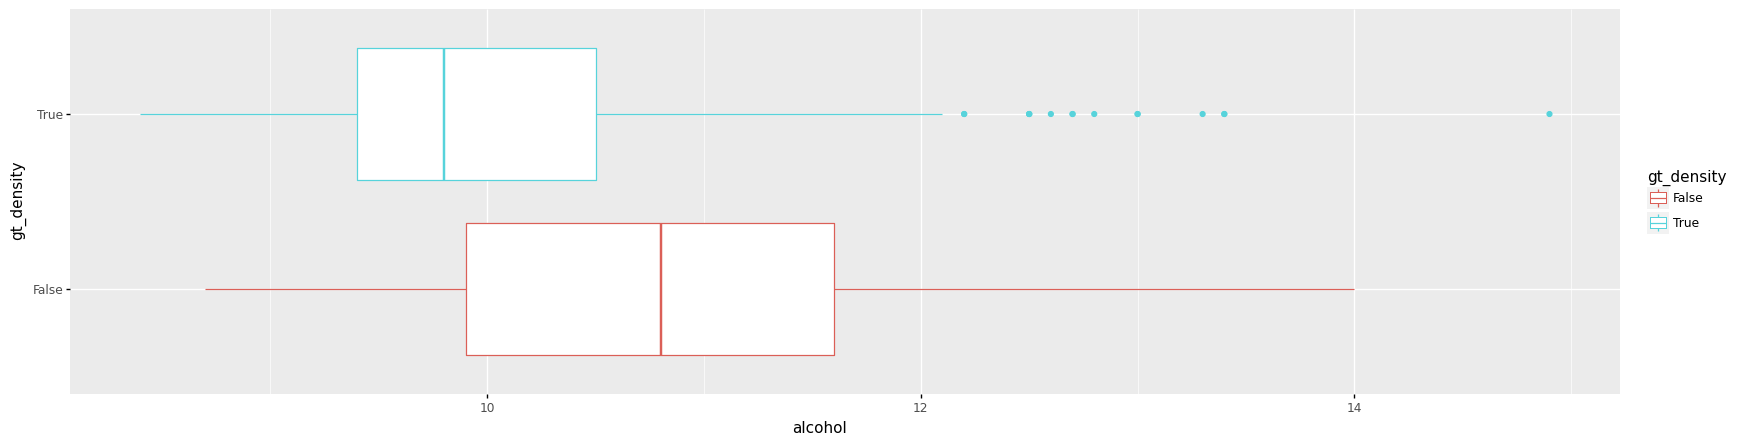

In [3]:
graf_boxplot(data, 'gt_density', 'alcohol')

#### b. Density

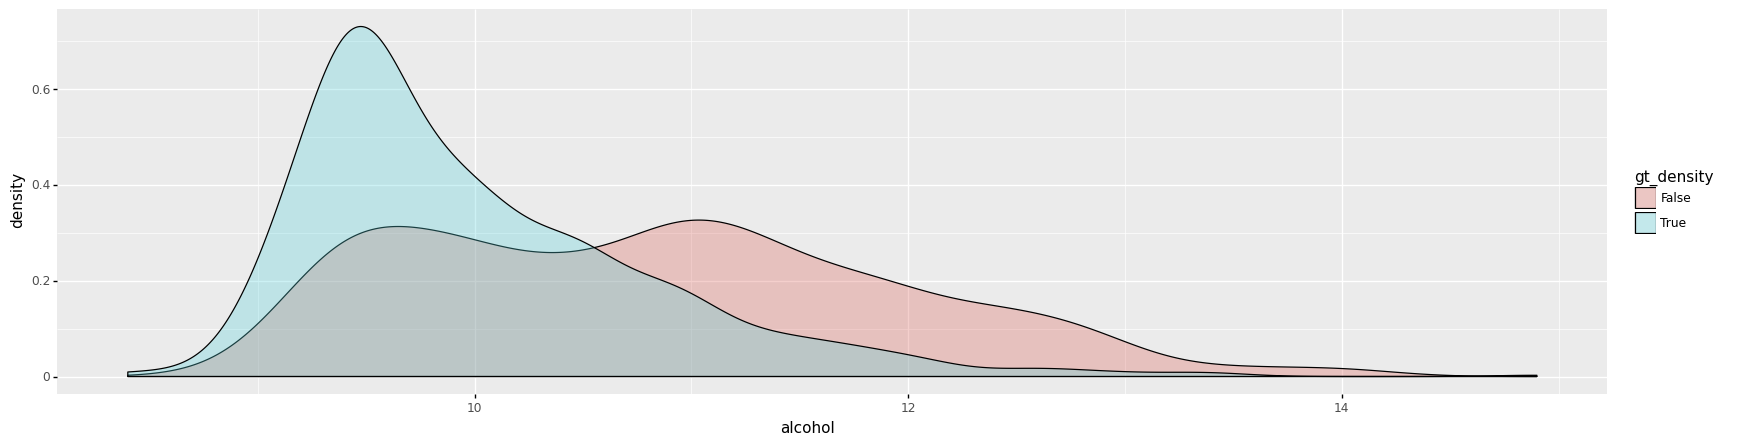

In [4]:
graf_density(data, 'alcohol', 'gt_density')

Now, Can visualace the data is balance between categories.

#### c. Bar
We can see the balance in the data

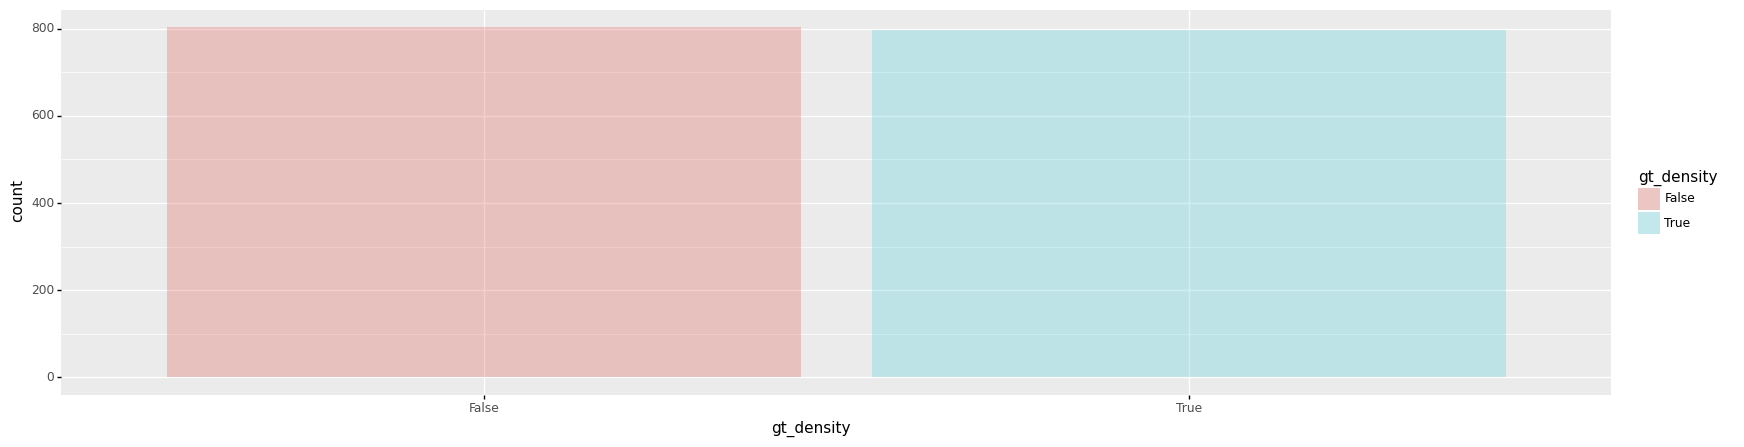

In [5]:
graf_bar(data, 'gt_density')

In [6]:
data[['quality', 'gt_density']].groupby('gt_density').count()

,quality
gt_density,
False,803
True,796


In this part, observed of the data is balance, because we use to median in this, so this indicator give to the middle data

## Building of model

In [7]:
X = data[['alcohol']]
y = data['gt_density']

X_train, X_test, y_train, y_test = train_test_split(
                                            X.values.reshape(-1,1),
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                        )


best_model = look_optimezed_param(X, y)

# Building Model again with best params
lr = LogisticRegression(C = best_model.best_estimator_.get_params()['C'],
                        penalty = best_model.best_estimator_.get_params()['penalty'])
lr.fit(X_train,y_train)

# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr.predict_proba(X_test)[:, 1]
# predict labels on test dataset
y_pred_test = lr.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")

# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))

# Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))

# Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))


Best Penalty: l2
Best C: 3.730229437354635
confusion Matrix is :nn [[ 96  61]
 [ 43 120]]
n
ROC-AUC score  test dataset:  t 0.7229690125434722
precision score  test dataset:  t 0.6629834254143646
Recall score  test dataset:  t 0.7361963190184049


## Graphy Receiver operanting characteristic

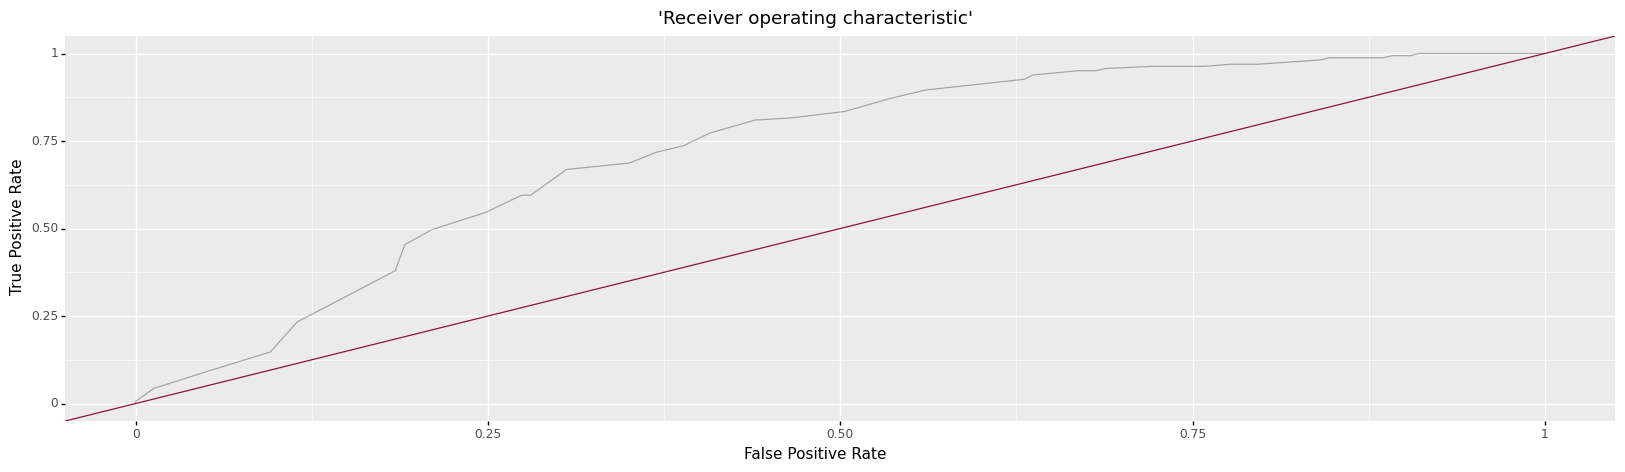

In [8]:
graf_roc(y_test, X_test, lr)

# Ajust

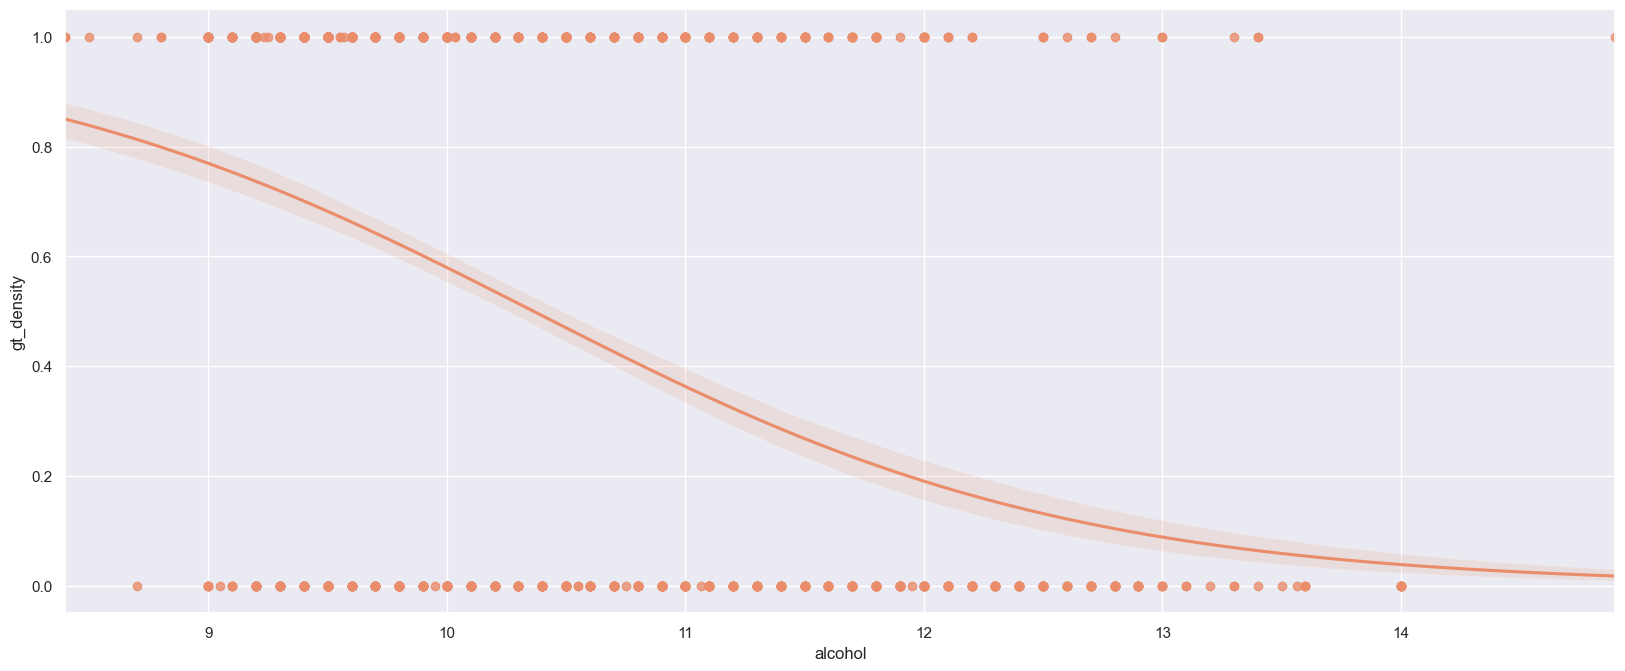

In [9]:
graf_lr(X, y, data)